In [81]:
#Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

### Read the input file 'Diabetes.csv' using Pandas and check it's column names(1 Marks)

In [82]:
diabetes_df = pd.read_csv("diabetes.csv")

In [83]:
# Eye ball the imported dataset

In [84]:
diabetes_df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [85]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [86]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [87]:
# Minimum values of Glucose, BloodPressure and BMI can never be zero. 
# We must replace zero with median values.

In [88]:
diabetes_df["Glucose"].replace(0,diabetes_df["Glucose"].median(),inplace=True)
diabetes_df["BloodPressure"].replace(0,diabetes_df["BloodPressure"].median(),inplace=True)
diabetes_df["BMI"].replace(0,diabetes_df["BMI"].median(),inplace=True)

In [89]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Check dimension of dataset

In [90]:
diabetes_df.shape

(768, 9)

### Check distribution of dependent variable, Outcome and plot it (1 Marks)

In [91]:
diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,-0.081672,-0.073535,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.074455,0.331709,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.007937,-0.045769,0.281132,-0.002378,0.324915,0.165723
SkinThickness,-0.081672,0.074455,0.007937,1.000000,0.436783,0.381740,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331709,-0.045769,0.436783,1.000000,0.185356,0.185071,-0.042163,0.130548
BMI,0.021546,0.231400,0.281132,0.381740,0.185356,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.183928,0.185071,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,-0.113970,-0.042163,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.074752,0.130548,0.312249,0.173844,0.238356,1.000000


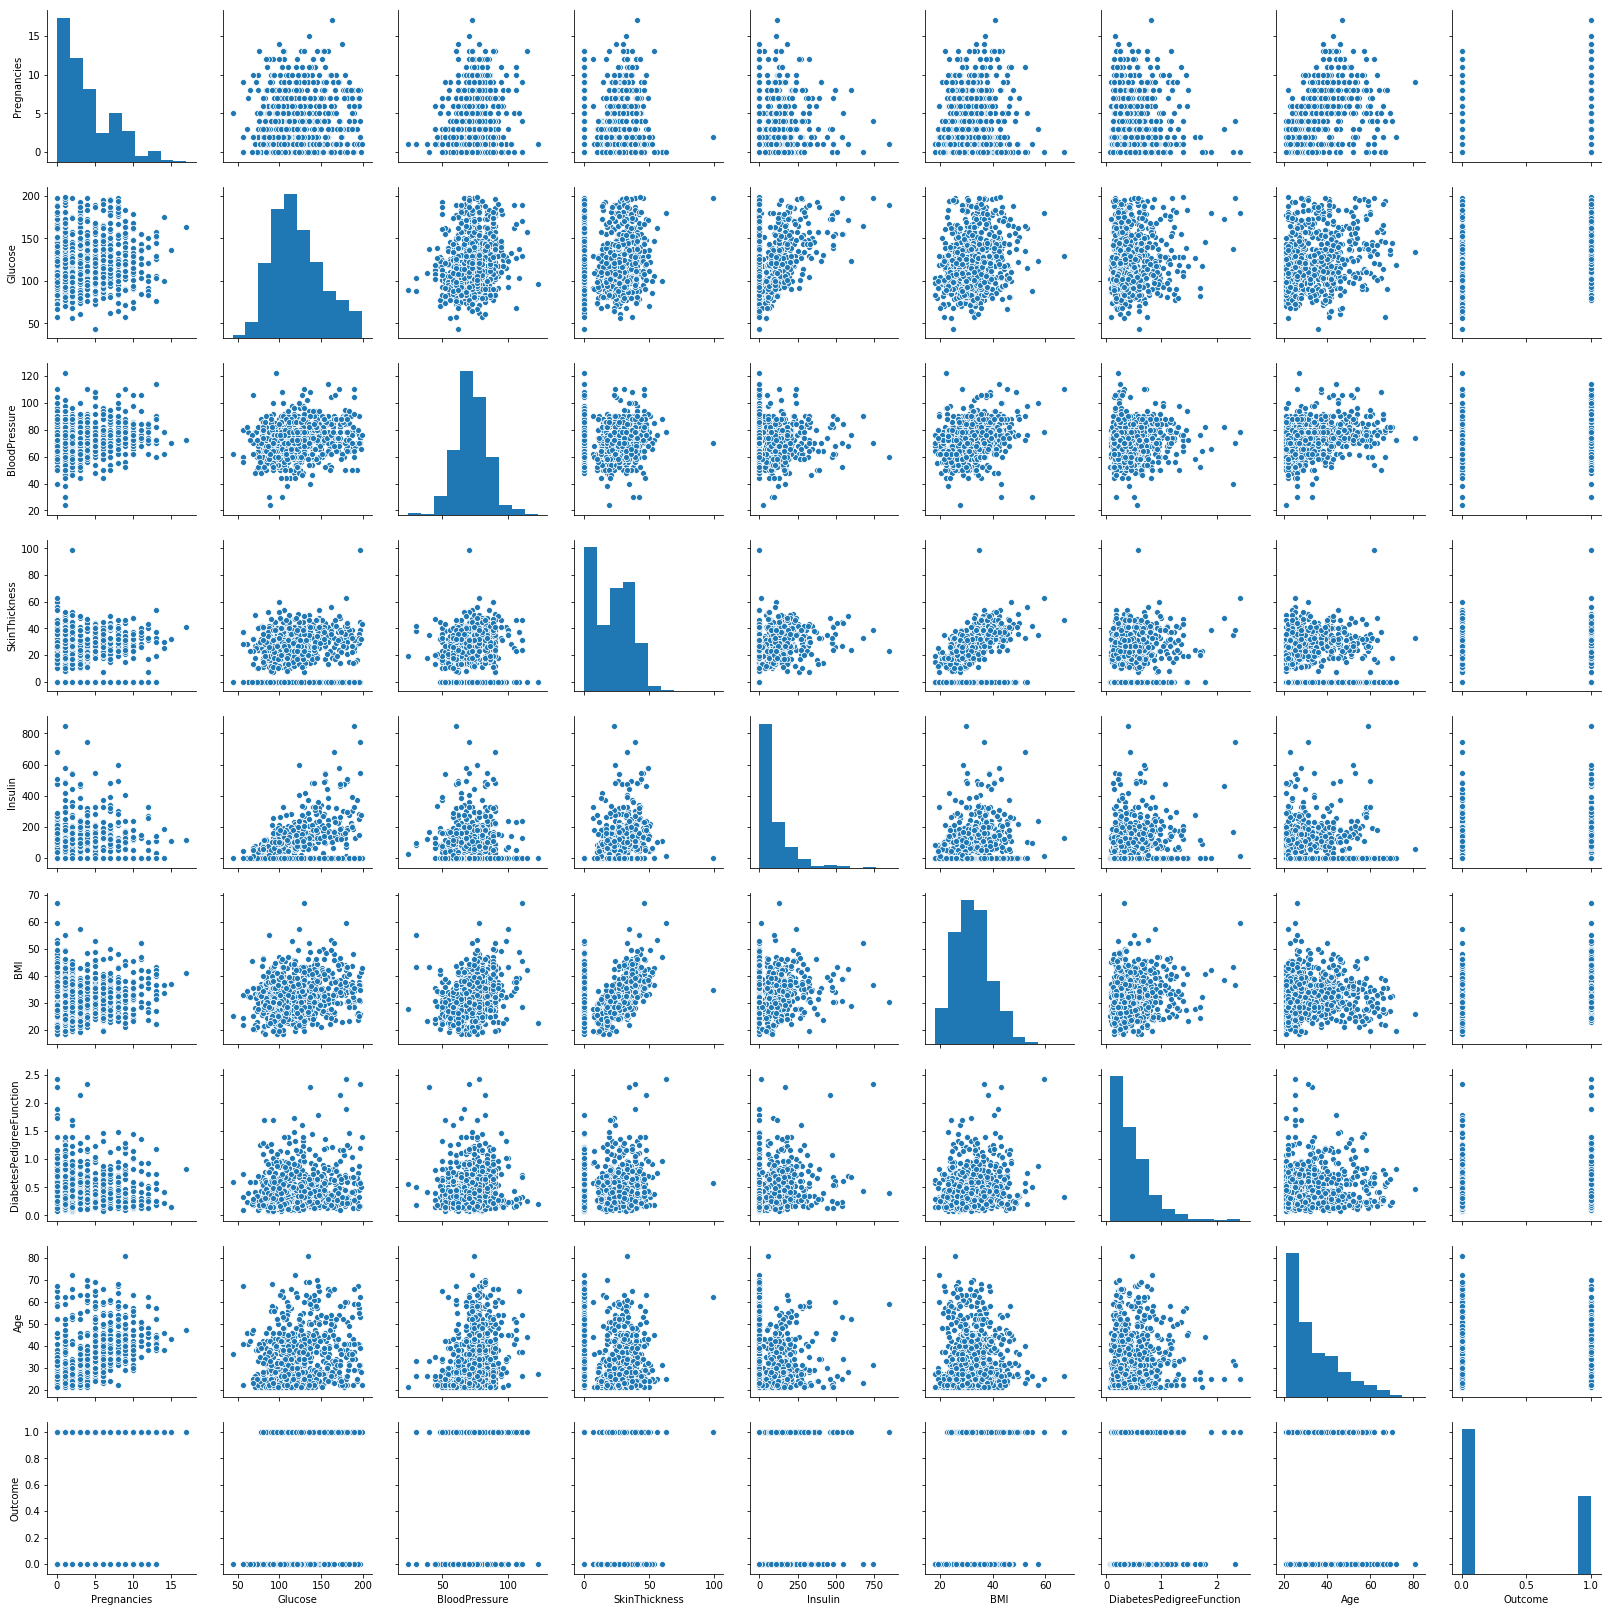

In [92]:
import seaborn as sns
sns.pairplot(diabetes_df)

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [93]:
diabetes_df.groupby(["Outcome"]).count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


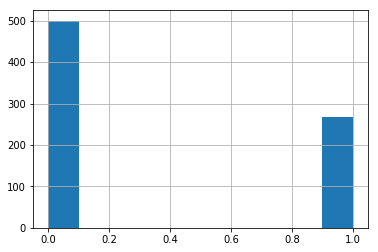

In [94]:
diabetes_df["Outcome"].hist()

In [95]:
# Check data types and info of dataset

In [96]:
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [97]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Check data distribution using summary statistics and provide your findings(2 Marks)

In [98]:
diabetes_df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,20.536458,79.799479,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,15.952218,115.244002,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [99]:
diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,-0.081672,-0.073535,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.074455,0.331709,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.007937,-0.045769,0.281132,-0.002378,0.324915,0.165723
SkinThickness,-0.081672,0.074455,0.007937,1.000000,0.436783,0.381740,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331709,-0.045769,0.436783,1.000000,0.185356,0.185071,-0.042163,0.130548
BMI,0.021546,0.231400,0.281132,0.381740,0.185356,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.183928,0.185071,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,-0.113970,-0.042163,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.074752,0.130548,0.312249,0.173844,0.238356,1.000000


### Do correlation analysis and bivariate viualization with Insights(1 Marks)

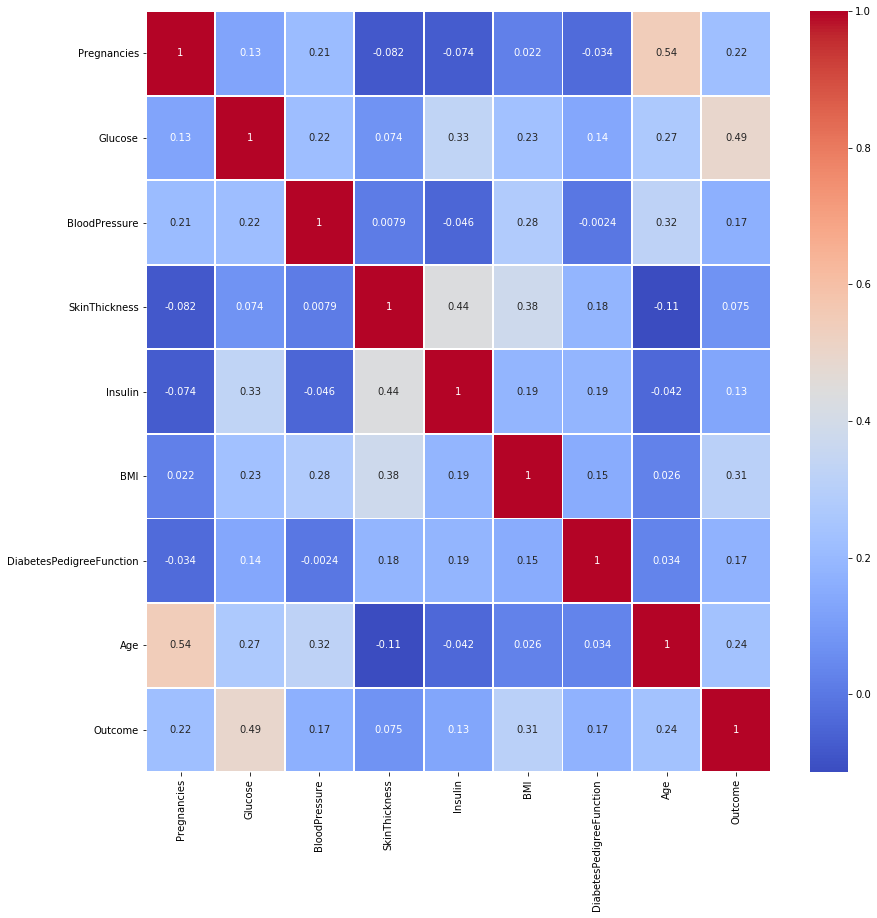

In [100]:
#diabetes_df.boxplot(figsize=(20,10),rot=45)
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(diabetes_df.corr(), annot=True, linewidths=0.9, ax=ax,cmap='coolwarm')

/Users/kumanish/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/kumanish/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/kumanish/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/kumanish/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, *

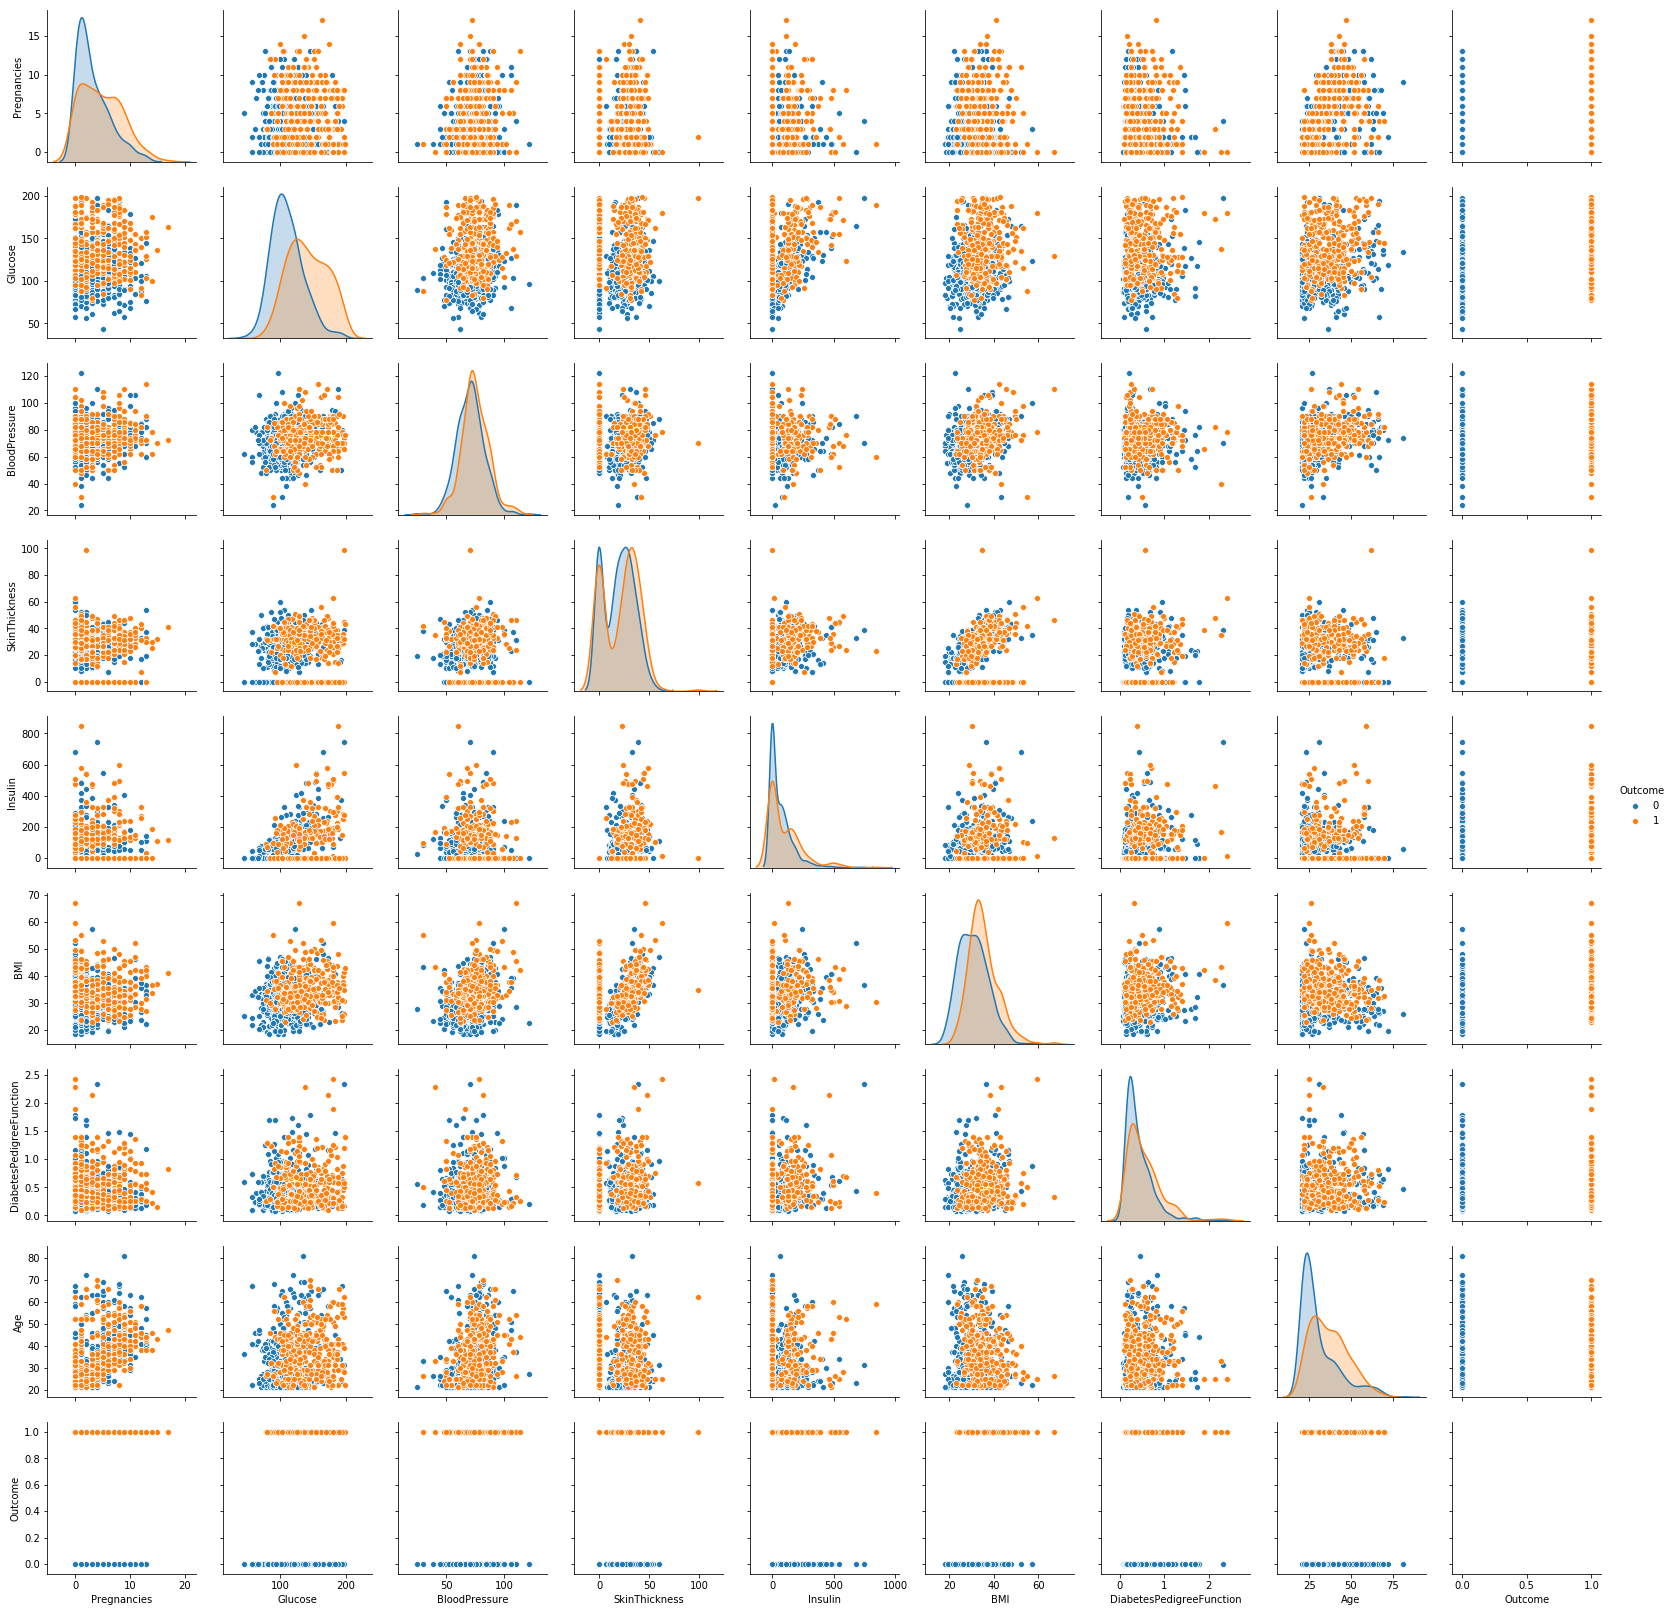

In [101]:
sns.pairplot(diabetes_df,diag_kind='kde',hue='Outcome')

#### Do train and test split with stratify sampling on Outcome variable to maintain the distribution of dependent variable(1 Marks)

In [102]:
X = diabetes_df.drop("Outcome", axis=1)
y = diabetes_df["Outcome"]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7,stratify=y)

### Train Support Vector Machine Model(1 Marks)

In [104]:
# use from sklearn.svm import SVC

In [105]:
from sklearn.svm import SVC

In [106]:
model = SVC()

In [107]:
X = diabetes_df.drop("Outcome", axis=1)
y = diabetes_df["Outcome"]

In [108]:
model.fit(X_train, y_train)


/Users/kumanish/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [109]:
model.score(X_train, y_train)

1.0

In [110]:
model.score(X_test, y_test)

0.6493506493506493

In [111]:
# your insights

In [112]:
# Default kernel is choosen as rbf and C = 1
#Lets check the score with both rbf and linear kernel with C = 1

In [113]:
kernal = ['rbf','linear']
for k in kernal:
    model = SVC(kernel = k)
    model.fit(X_train, y_train)
    print(k,'-','train -',model.score(X_train, y_train))
    print(k,'-','test -',model.score(X_test, y_test))

/Users/kumanish/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


rbf - train - 1.0
rbf - test - 0.6493506493506493
linear - train - 0.7728119180633147
linear - test - 0.7575757575757576


### Scale the data points using MinMaxScaler ( 1 Marks)

In [114]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_X=scaler.fit_transform(X)
scaled_X

/Users/kumanish/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.35294118, 0.67096774, 0.48979592, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.05882353, 0.26451613, 0.42857143, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.47058824, 0.89677419, 0.40816327, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.49677419, 0.48979592, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.05882353, 0.52903226, 0.36734694, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.05882353, 0.31612903, 0.46938776, ..., 0.24948875, 0.10119556,
        0.03333333]])

In [115]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=7)

### Fit SVM Model on Scale data and give your observation( 1 Marks)

In [116]:
ker = ['rbf','linear']
for k in ker:
    model = SVC(kernel = k)
    model.fit(X_train, y_train)
    print("using train data")
    print(k,'-',model.score(X_train, y_train))
    print("using test data")
    print(k,'-',model.score(X_test, y_test))

using train data
rbf - 0.770949720670391
using test data
rbf - 0.7662337662337663
using train data
linear - 0.7746741154562383
using test data
linear - 0.7792207792207793


/Users/kumanish/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#we can try increasing either C or gamma to fit a more complex model.

### Try improving the model accuracy using C=1000 (1 Marks)

In [117]:
kernal = ['rbf','linear']
for k in kernal:
    model = SVC(C=1000,kernel = k)
    model.fit(X_train, y_train)
    print(k,'-',model.score(X_train, y_train))
    print(k,'-',model.score(X_test, y_test))


rbf - 0.8081936685288641
rbf - 0.7619047619047619
linear - 0.7728119180633147
linear - 0.7619047619047619


/Users/kumanish/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [118]:
kernal = ['rbf','linear']
gamma = [10,100,500,1000,2000,5000]
result = pd.DataFrame()
for k in ker:
    for g in gamma:
        model = SVC(C=g,kernel = k)
        model.fit(X_train, y_train)
        result = res.append({'kernel':k,'C':g,'accuracy':model.score(X_test, y_test)},ignore_index=True) 
        

/Users/kumanish/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/kumanish/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/kumanish/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/kumanish/anaconda3/lib/python3.7/site-p

In [119]:
result

,C,accuracy,kernel
0,10.0,0.779221,rbf
1,100.0,0.787879,rbf
2,500.0,0.770563,rbf
3,1000.0,0.761905,rbf
4,2000.0,0.783550,rbf
5,5000.0,0.779221,rbf
6,10.0,0.757576,linear
7,100.0,0.761905,linear
8,500.0,0.761905,linear
9,1000.0,0.761905,linear


In [ ]:
#After increasing C, result for both the kernels has improved. 
#For rbf accuracy score is 0.78 for C = 2000
#For linear kernel accuracy score is 0.76 for C = 100. There is no increase in score with further increase in C. 

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [120]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [121]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [122]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [123]:
X_train_scaled=scaler.fit_transform(X_train)
gs.fit(X_train_scaled, y_train) 

/Users/kumanish/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=12,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [124]:
gs.best_estimator_

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [125]:
gs.best_score_ 

0.7728119180633147